## Install Spark

In [ ]:
# Download Java Virtual Machine (JVM)
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
# Download Spark
!wget -q https://dlcdn.apache.org/spark/spark-3.2.4/spark-3.2.4-bin-hadoop3.2.tgz

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Unzip the file
!tar -xzvf spark-3.2.4-bin-hadoop3.2.tgz

spark-3.2.4-bin-hadoop3.2/
spark-3.2.4-bin-hadoop3.2/R/
spark-3.2.4-bin-hadoop3.2/R/lib/
spark-3.2.4-bin-hadoop3.2/R/lib/sparkr.zip
spark-3.2.4-bin-hadoop3.2/R/lib/SparkR/
spark-3.2.4-bin-hadoop3.2/R/lib/SparkR/html/
spark-3.2.4-bin-hadoop3.2/R/lib/SparkR/html/R.css
spark-3.2.4-bin-hadoop3.2/R/lib/SparkR/html/00Index.html
spark-3.2.4-bin-hadoop3.2/R/lib/SparkR/help/
spark-3.2.4-bin-hadoop3.2/R/lib/SparkR/help/aliases.rds
spark-3.2.4-bin-hadoop3.2/R/lib/SparkR/help/AnIndex
spark-3.2.4-bin-hadoop3.2/R/lib/SparkR/help/SparkR.rdx
spark-3.2.4-bin-hadoop3.2/R/lib/SparkR/help/SparkR.rdb
spark-3.2.4-bin-hadoop3.2/R/lib/SparkR/help/paths.rds
spark-3.2.4-bin-hadoop3.2/R/lib/SparkR/INDEX
spark-3.2.4-bin-hadoop3.2/R/lib/SparkR/worker/
spark-3.2.4-bin-hadoop3.2/R/lib/SparkR/worker/worker.R
spark-3.2.4-bin-hadoop3.2/R/lib/SparkR/worker/daemon.R
spark-3.2.4-bin-hadoop3.2/R/lib/SparkR/tests/
spark-3.2.4-bin-hadoop3.2/R/lib/SparkR/tests/testthat/
spark-3.2.4-bin-hadoop3.2/R/lib/SparkR/tests/testthat/te

In [ ]:
import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.4-bin-hadoop3.2"

In [ ]:
# Install library for finding Spark
!pip install -q findspark
# Import the libary
import findspark
# Initiate findspark
findspark.init()
# Check the location for Spark
findspark.find()

'/content/spark-3.2.4-bin-hadoop3.2'

## Text Analytics

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Q1").getOrCreate()

In [ ]:
import pyarrow.parquet as parquet
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
# specify the path to the Parquet file
file_path = '/content/drive/MyDrive/spring/big_data/assignment/VenmoSample.snappy.parquet'

# # read the Parquet file into a Pandas DataFrame
df = parquet.read_table(file_path).to_pandas()
# df = spark.createDataFrame(df)


# inputFile = spark.read.csv("ecommerce.csv", inferSchema = True, header = True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
emoji_dic = spark.read.csv("/content/drive/MyDrive/spring/big_data/assignment/Venmo_Emoji_Classification_Dictionary.csv",inferSchema = True, header = True)

In [ ]:
word_dic = spark.read.csv("/content/drive/MyDrive/spring/big_data/assignment/Venmo Word Classification Dictonary.csv",inferSchema = True, header = True)

In [ ]:
word_dic.show(5)

+----------+---------+---------+--------+------+--------------+-----------+-----+---------------+----+----+----+----+
|    People|     Food|    Event|Activity|Travel|Transportation|    Utility| Cash|Illegal/Sarcasm| _c9|_c10|_c11|_c12|
+----------+---------+---------+--------+------+--------------+-----------+-----+---------------+----+----+----+----+
|    friend|     food| birthday|    ball| beach|          lyft|       bill| atm |      addiction|null|null|null|null|
|friendship|      bbq|christmas|    boat| place|          uber|      cable|bank |           drug|null|null|null|null|
|      baby|     bean|    happy|     bar|    la|           cab|        fee|cash |          wangs|null|null|null|null|
|       boy|    latte|     bday|    book| world|           bus|   electric|money|           weed|null|null|null|null|
|      girl|breakfast|  wedding|    club| hotel|           car|electricity| buck|           anal|null|null|null|null|
+----------+---------+---------+--------+------+--------

In [ ]:
word_dic_pd = word_dic.toPandas()

In [ ]:
reverse_word_dict = pd.melt(word_dic_pd, var_name="category", value_name="word").set_index("word")["category"].to_dict()

reverse_word_dict_pd = pd.DataFrame(list(reverse_word_dict.items()), columns=["word", "category"])
reverse_word_dict_pd.head()

,word,category
0,friend,People
1,friendship,People
2,baby,People
3,boy,People
4,girl,People


In [ ]:
emoji_dict_pd = emoji_dic.toPandas()
reverse_emoji_dict = pd.melt(emoji_dict_pd, var_name="category", value_name="emoji").set_index("emoji")["category"].to_dict()

In [ ]:
reverse_emoj_dict_pd = pd.DataFrame(list(reverse_emoji_dict.items()), columns=["emoji", "category"])
reverse_emoj_dict_pd.head()
# # Convert the pandas DataFrame to a PySpark DataFrame
# reverse_emoj_dict_spark = spark.createDataFrame(reverse_emoj_dict_pd)

# # Show the first few rows of the DataFrame
# reverse_emoj_dict_spark.show()

,emoji,category
0,🇦🇺,Event
1,🇫🇷,Event
2,🎂,Event
3,🛍,Event
4,🇨🇦,Event


In [ ]:
reverse_word_dict_pd[reverse_word_dict_pd['word'].values =='uber']

,word,category
743,uber,Transportation


In [ ]:
def classify_description(description):
    for des in description.split():
        if des.lower() in reverse_emoj_dict_pd['emoji'].values:
            category = reverse_emoj_dict_pd[reverse_emoj_dict_pd['emoji'] == des.lower()]['category'].values[0]
            # print(des + " " + category)
            return category
        elif des.lower() in reverse_word_dict_pd['word'].values:
            category = reverse_word_dict_pd[reverse_word_dict_pd['word'] == des.lower()]['category'].values[0]
            return category
    return "Unknown"

df['category'] = df['description'].apply(classify_description)

In [ ]:
#df_cat[df_cat['description']=='🍕'] # test

In [ ]:
# df.to_parquet('data.parquet')
# from google.colab import files

# files.download('data.parquet')

In [ ]:
file_path = '/content/drive/MyDrive/spring/big_data/assignment/data_category.parquet'

# # read the Parquet file into a Pandas DataFrame
df_cat = parquet.read_table(file_path).to_pandas()

In [ ]:
df_cat.head()

,user1,user2,transaction_type,datetime,description,is_business,story_id,category
0,1218774,1528945,payment,2015-11-27 10:48:19,Uber,False,5657c473cd03c9af22cff874,Transportation
1,5109483,4782303,payment,2015-06-17 11:37:04,Costco,False,5580f9702b64f70ab0114e94,Food
2,4322148,3392963,payment,2015-06-19 07:05:31,Sweaty balls,False,55835ccb1a624b14ac62cef4,Illegal/Sarcasm
3,469894,1333620,charge,2016-06-03 23:34:13,🎥,False,5751b185cd03c9af224c0d17,Event
4,2960727,3442373,payment,2016-05-29 23:23:42,⚡,False,574b178ecd03c9af22cf67f4,Utility


Q2:  What is the percent of emoji only transactions? Which are the top 5 most popular emoji? Which are the top three most popular emoji categories?


In [ ]:
# data = [['words', 'category_1', 'I love tomorrow  😀'],
#         ['words', 'category_2', 'I love tomorrow  😀'],
#         ['words', 'category_2', '😀  😀'],
#          ['words', 'category_2', '😀  😀']]
# df = pd.DataFrame(data, columns=['type', 'category', 'description'])
# pip install emoji
# import emoji


#### calculate the percen of emoji only transactions
# def emoji_only_trans(description):
#     emoji_only = 0
#     for words in description.split():
#       emoji_words = [word for word in words if emoji.emoji_count(word) > 0]
#       len_emoji_words = len(emoji_words)
#       if len_emoji_words == len(description):
#           emoji_only = emoji_only+1
#     return emoji_only

# # emoji_only_num = df['description'].apply(emoji_only_trans)

# emoji_only_num =  df['description'].apply(emoji_only_trans)


In [ ]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.7/353.7 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.4.0-py2.py3-none-any.whl size=350809 sha256=add360d8a8a68da93498a146cdb13a25bda578be6b775560a85b30455e26b2b9
  Stored in directory: /root/.cache/pip/wheels/79/29/1c/234cae4632803c2ba4a76a71a679eb1383cf590775714e2a21
Successfully built emoji


In [ ]:
import emoji

def emoji_only_trans(description):
    emoji_words = [word for word in description.split() if all(c in emoji.EMOJI_DATA for c in word)]
    if len(emoji_words) == len(description.split()):
        return 1
    else:
        return 0
emoji_only_num = df_cat['description'].apply(emoji_only_trans).sum()
percentage_of_only_emoji = emoji_only_num / len(df_cat)
print('There are '+ str(percentage_of_only_emoji*100) +'% emoji only transactions in the dataset.')



There are 23.54321307181346% emoji only transactions in the dataset.


In [ ]:
import emoji

emoji_counts = {}

for description in df_cat['description']:
    for char in description:
        if char in emoji.EMOJI_DATA:
            if char in emoji_counts:
                emoji_counts[char] += 1
            else:
                emoji_counts[char] = 1

top_emojis = sorted(emoji_counts.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 most popular emojis:")
for emoji, count in top_emojis:
    print(f"{emoji}: {count}")



Top 5 most popular emojis:
🍕: 215039
🍻: 145233
💸: 124727
🍷: 111157
🎉: 94327


In [ ]:
# import emoji
# processed_desc = set()
# category_counts = {}

# for description in df1['description']:
#     if description in processed_desc:
#         continue
#     for char in description:
#         if char in emoji.EMOJI_DATA:
#             category = df1[df1['description'] == description]['category'].iloc[0]
#             if category in category_counts:
#                 category_counts[category] += 1
#             else:
#                 category_counts[category] = 1
#             break
            
#     processed_desc.add(description)

# top_category = sorted(category_counts.items(), key=lambda x: x[1], reverse=True)[:3]
# print("Top 3 most popular categories:")
# for category, count in top_category:
#     print(f"{category}: {count}")




In [ ]:
from pyspark.sql import SparkSession
# import emoji

# create a SparkSession
spark = SparkSession.builder.appName("EmojiCount").getOrCreate()

# read the Parquet file as a DataFrame
df_spark = spark.read.parquet("/content/drive/MyDrive/spring/big_data/assignment/data_category.parquet")
# df_spark.show()


In [ ]:
from pyspark.sql.functions import udf
from pyspark.sql.types import BooleanType
import emoji

# define a UDF to check if a string contains an emoji
def contains_emoji(text):
    for char in text:
        if char in emoji.EMOJI_DATA:
            return True
    return False

contains_emoji_udf = udf(contains_emoji, BooleanType())

# filter the DataFrame to keep only the rows with descriptions containing an emoji
emoji_df = df_spark.filter(contains_emoji_udf(df_spark.description))

# group the DataFrame by category and description to remove duplicates
grouped_df = emoji_df.groupBy("category", "description").agg({"category": "count"})

# group the DataFrame by category to compute the category counts
category_counts = grouped_df.groupBy("category").agg({"count(category)": "sum"}) \
                             .withColumnRenamed("sum(count(category))", "count") \
                             .orderBy("count", ascending=False) \
                             .limit(3)

# display the results
category_counts.show()


+--------+-------+
|category|  count|
+--------+-------+
| Unknown|1368427|
|    Food| 466254|
|  People| 261919|
+--------+-------+



In [ ]:
# not using spark
# category_counts = {}
# processed_desc = set()
# data = [['words', '😀', 'event'],
#         ['words', ' I love 😀', 'people'],
#         ['words', '11😀', 'they'],
#         ['words', '🎥', 'event']]
# df = pd.DataFrame(data, columns=['type', 'description', 'category'])

# for description in df['description']:
#     if description in processed_desc:
#         continue
#     for char in description:
#         if char in emoji.EMOJI_DATA:
#             category = df[df['description'] == description]['category'].iloc[0]
#             if category in category_counts:
#                 category_counts[category] += 1
#             else:
#                 category_counts[category] = 1
#             break
#     processed_desc.add(description)

# top_category = sorted(category_counts.items(), key=lambda x: x[1], reverse=True)[:3]
# print("Top 3 most popular categories:")
# for category, count in top_category:
#     print(f"{category}: {count}")


Q3 [5 pts]: For each user, create a variable to indicate their spending behavior profile. For example, if a user has made 10 transactions, where 5 of them are food and the other 5 are activity, then the user’s spending profile will be 50% food and 50% activity.



In [ ]:
from pyspark.sql.functions import count, sum

grouped = df_spark.groupBy('user1', 'category').agg(count('*').alias('count'))

pivoted = grouped.groupBy('user1').pivot('category').agg(sum('count')).fillna(0)



In [ ]:
pivoted.show(5)

+-----+--------+----+-----+----+---------------+------+--------------+------+-------+-------+
|user1|Activity|Cash|Event|Food|Illegal/Sarcasm|People|Transportation|Travel|Unknown|Utility|
+-----+--------+----+-----+----+---------------+------+--------------+------+-------+-------+
| 6620|       0|   0|    0|   0|              0|     0|             0|     1|      1|      0|
|28170|       0|   0|    0|   0|              0|     0|             0|     0|      1|      0|
|28759|       0|   0|    0|   1|              0|     0|             0|     0|      1|      1|
|29894|       0|   0|    0|   0|              0|     0|             0|     0|      1|      0|
|33602|       2|   1|    0|   0|              0|     1|             0|     0|      6|      0|
+-----+--------+----+-----+----+---------------+------+--------------+------+-------+-------+
only showing top 5 rows



In [ ]:
from pyspark.sql import functions as F
from functools import reduce

# Columns that you want to sum up
column_names = ['Activity', 'Cash', 'Event', 'Food', 'Illegal/Sarcasm', 'People', 'Transportation', 'Travel', 'Unknown', 'Utility']

# Calculate the sum for each row
pivoted = pivoted.withColumn("total", reduce(lambda a, b: a + b, [F.col(c) for c in column_names]))

# Calculate the proportion for each category and create a new variable
for col in column_names:
    pivoted = pivoted.withColumn(f"{col}_proportion", F.when(pivoted["total"] != 0, F.col(col) / pivoted["total"]).otherwise(0))
    pivoted = pivoted.withColumn(f"{col}_percentage", F.format_string("%2.2f%%", F.col(f"{col}_proportion") * 100))

# Concatenate the proportion strings
pivoted = pivoted.withColumn(
    "proportions", 
    F.concat_ws(", ", *[F.when(F.col(f"{col}_proportion") > 0, F.concat(F.lit(f"{col}: "), F.col(f"{col}_percentage"))).otherwise(None) for col in column_names])
)

# pivoted.show(truncate=False)


 In the previous question, you got a static spending profile. However, life and social networks are evolving over time. Therefore, let’s explore how a user’s spending profile is evolving over her lifetime in Venmo. First of all, you need to analyze a user’s transactions in monthly intervals, starting from 0 (indicating their first transaction only) up to 12.
For example, assume a user’s first transaction was a pizza emoji. Then, her user profile at 0 would be 100% food. Now, by the end of her first month in Venmo, she has transacted 4 times, 2 of them are food and 2 are activity related. Her speding profile in 1 month is 50% food and 50% activity. Following this logic, you need to create a user’s profile up to 12 months (Hint: You can use window functions to do this).
If you do this right, you will create a dynamic spending profile for each user. However, this is meaningless to plot. Let’s plot instead the spending profile of the average user. To do this, for each time point, you need to compute the average and standard deviation of each spending category across all users. Therefore, in your y-axis, you will have time in months (from 0 up to 12). In your x-axis, for each time point, . What do you observe? Does the spending profile of the average customer stabilize after some point in time?


In [ ]:
from pyspark.sql.functions import floor, datediff, min, when, col
from pyspark.sql.window import Window

# Define a window partitioned by user
window = Window.partitionBy('user1').orderBy('datetime')

# Define the date of the first transaction for each user
first_transaction_date = min('datetime').over(window)

# Add a column with the number of days since the first transaction
df_spark = df_spark.withColumn('days_since_first', datediff(col('datetime'), first_transaction_date))

# Calculate the 'month' (0-12) for each transaction, with the first transaction in Month 0
df_spark = df_spark.withColumn('month', 
                               when(col('days_since_first') == 0, 0)
                               .otherwise(floor((col('days_since_first') - 1) / 30) + 1))

# Limit the DataFrame to the first 12 months
df_spark = df_spark.filter(col('month') <= 12)

In [ ]:
df_spark[df_spark['user1']=='4'].show()

+-----+------+----------------+-------------------+-----------+-----------+--------------------+--------+----------------+-----+
|user1| user2|transaction_type|           datetime|description|is_business|            story_id|category|days_since_first|month|
+-----+------+----------------+-------------------+-----------+-----------+--------------------+--------+----------------+-----+
|    4|122744|         payment|2012-12-03 03:35:53|    hot sex|      false|54e41a2ecd03c9af2...|    Food|               0|    0|
|    4|125527|         payment|2012-12-15 05:51:12|        BBQ|      false|50cb9fed25ee44b9a...|    Food|              12|    1|
+-----+------+----------------+-------------------+-----------+-----------+--------------------+--------+----------------+-----+



In [ ]:

from pyspark.sql import functions as F
from pyspark.sql.window import Window
from functools import reduce

# Convert the 'datetime' column to a timestamp type
df_spark = df_spark.withColumn('datetime', F.to_timestamp('datetime'))

# Extract the year and month from the timestamp
df_spark = df_spark.withColumn('month_year', F.date_format('datetime', 'yyyy-MM'))

# Group by both 'user1' and 'month_year', then count the categories
grouped = df_spark.groupBy('user1', 'month_year', 'category').count()

# Pivot the DataFrame to have a column for each category
pivoted = grouped.groupBy('user1', 'month_year').pivot('category').sum('count').fillna(0)

# Columns that you want to sum up
column_names = ['Activity', 'Cash', 'Event', 'Food', 'Illegal/Sarcasm', 'People', 'Transportation', 'Travel', 'Unknown', 'Utility']

# Calculate the sum for each row
pivoted = pivoted.withColumn("total", reduce(lambda a, b: a + b, [F.col(c) for c in column_names]))

# Calculate the proportion for each category and create a new variable
for col in column_names:
    pivoted = pivoted.withColumn(f"{col}_proportion", F.when(pivoted["total"] != 0, F.col(col) / pivoted["total"]).otherwise(0))
    pivoted = pivoted.withColumn(f"{col}_percentage", F.format_string("%2.2f%%", F.col(f"{col}_proportion") * 100))

# Concatenate the proportion strings
pivoted = pivoted.withColumn(
    "proportions", 
    F.concat_ws(", ", *[F.when(F.col(f"{col}_proportion") > 0, F.concat(F.lit(f"{col}: "), F.col(f"{col}_percentage"))).otherwise(None) for col in column_names])
)



In [ ]:
pivoted[pivoted['user1']=='2'].show()

+-----+----------+--------+----+-----+----+---------------+------+--------------+------+-------+-------+-----+-------------------+-------------------+---------------+---------------+----------------+----------------+---------------+---------------+--------------------------+--------------------------+-----------------+-----------------+-------------------------+-------------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+----------------+
|user1|month_year|Activity|Cash|Event|Food|Illegal/Sarcasm|People|Transportation|Travel|Unknown|Utility|total|Activity_proportion|Activity_percentage|Cash_proportion|Cash_percentage|Event_proportion|Event_percentage|Food_proportion|Food_percentage|Illegal/Sarcasm_proportion|Illegal/Sarcasm_percentage|People_proportion|People_percentage|Transportation_proportion|Transportation_percentage|Travel_proportion|Travel_percentage|Unknown_proportion|Unknown_percentage|Utility_proporti

In [ ]:
from pyspark.sql.functions import countDistinct

# Calculate the number of unique months for each user
user_month_counts = pivoted.groupBy('user1').agg(countDistinct('month_year').alias('num_months'))

# Filter users that have 13 unique months
valid_users = user_month_counts.filter(user_month_counts.num_months == 13)

# Join back to the original spending_profile DataFrame to get the full data for these users
spending_profile = pivoted.join(valid_users, 'user1')

spending_profile.show()

+-------+----------+--------+----+-----+----+---------------+------+--------------+------+-------+-------+-----+-------------------+-------------------+--------------------+---------------+----------------+----------------+---------------+---------------+--------------------------+--------------------------+-----------------+-----------------+-------------------------+-------------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+--------------------+----------+
|  user1|month_year|Activity|Cash|Event|Food|Illegal/Sarcasm|People|Transportation|Travel|Unknown|Utility|total|Activity_proportion|Activity_percentage|     Cash_proportion|Cash_percentage|Event_proportion|Event_percentage|Food_proportion|Food_percentage|Illegal/Sarcasm_proportion|Illegal/Sarcasm_percentage|People_proportion|People_percentage|Transportation_proportion|Transportation_percentage|Travel_proportion|Travel_percentage|Unknown_proportion|Unknow

In [ ]:
from pyspark.sql.functions import row_number
# Define a window specification partitioned by the 'user1' column and ordered by the 'month_year' column
window_spec = Window.partitionBy('user1').orderBy('month_year')

# Add a 'rank' column based on the window specification
spending_profile = spending_profile.withColumn('month_year',  row_number().over(window_spec) - 1)

In [ ]:
spending_profile[spending_profile['user1']=='820531'].show()

+------+----------+--------+----+-----+----+---------------+------+--------------+------+-------+-------+-----+-------------------+-------------------+--------------------+---------------+----------------+----------------+---------------+---------------+--------------------------+--------------------------+-----------------+-----------------+-------------------------+-------------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+--------------------+----------+
| user1|month_year|Activity|Cash|Event|Food|Illegal/Sarcasm|People|Transportation|Travel|Unknown|Utility|total|Activity_proportion|Activity_percentage|     Cash_proportion|Cash_percentage|Event_proportion|Event_percentage|Food_proportion|Food_percentage|Illegal/Sarcasm_proportion|Illegal/Sarcasm_percentage|People_proportion|People_percentage|Transportation_proportion|Transportation_percentage|Travel_proportion|Travel_percentage|Unknown_proportion|Unknown_

In [ ]:
pivoted.show(truncate=False)

ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/content/spark-3.2.4-bin-hadoop3.2/python/lib/py4j-0.10.9.5-src.zip/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/content/spark-3.2.4-bin-hadoop3.2/python/lib/py4j-0.10.9.5-src.zip/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: ignored

In [ ]:
# Select only the columns you need
pivote_user_month_pro = pivoted.select('user1', 'month_year', 'proportions')

pivote_user_month_pro.show(truncate=False)

+-----+----------+----------------------------------------------+
|user1|month_year|proportions                                   |
+-----+----------+----------------------------------------------+
|3    |2016-09   |People: 100.00%                               |
|3    |2016-10   |Food: 20.00%, Unknown: 60.00%, Utility: 20.00%|
|12   |2012-10   |Activity: 100.00%                             |
|12   |2013-02   |Unknown: 100.00%                              |
|12   |2013-05   |Event: 100.00%                                |
|12   |2013-08   |Unknown: 100.00%                              |
|13   |2012-10   |Travel: 100.00%                               |
|13   |2013-03   |People: 100.00%                               |
|13   |2013-04   |Food: 100.00%                                 |
|13   |2013-07   |Unknown: 100.00%                              |
|16   |2014-07   |Food: 100.00%                                 |
|16   |2014-12   |Unknown: 100.00%                              |
|16   |201

In [ ]:
# Create DataFrame
# df = spark.createDataFrame(pivote_user_month_pro, ['user1', 'month_year', 'proportions'])
from pyspark.sql.functions import col, first, expr
from pyspark.sql.window import Window
from pyspark.sql.functions import explode, sequence, lit

# Convert month_year column to date type
pivote_user_month_pro = pivote_user_month_pro.withColumn('month_year', col('month_year').cast('date'))

# Window specification partitioned by user1 and ordered by month_year
window_spec = Window.partitionBy('user1').orderBy('month_year')

# Add column with the first occurrence month_year for each user
pivote_user_month_pro = pivote_user_month_pro.withColumn('first_month', first('month_year').over(window_spec))

# Generate a sequence of 12 months for each user starting from the first_month
pivote_user_month_pro = pivote_user_month_pro.withColumn('month_sequence', 
                                                         expr("sequence(first_month, date_add(first_month, 12*30), interval 1 month)"))

# Explode the month_sequence array to create new rows for each user and month
exploded_df = pivote_user_month_pro.select('user1', explode('month_sequence').alias('month_year'))

# Fill missing proportions with '0%'
exploded_df = exploded_df.join(pivote_user_month_pro, ['user1', 'month_year'], 'left')
exploded_df = exploded_df.fillna('0%', subset=['proportions'])



In [ ]:
exploded_df = exploded_df.orderBy('user1','month_year')
# Show the updated dataset

exploded_df = exploded_df.select('user1', 'month_year', 'proportions')
exploded_df.show()
# exploded_df[exploded_df['user1']=='4'].show(truncate=False)

+-----+----------+--------------------+
|user1|month_year|         proportions|
+-----+----------+--------------------+
|    2|2012-11-01|    Unknown: 100.00%|
|    2|2012-12-01|                  0%|
|    2|2013-01-01|                  0%|
|    2|2013-02-01|                  0%|
|    2|2013-03-01|                  0%|
|    2|2013-04-01|                  0%|
|    2|2013-05-01|                  0%|
|    2|2013-06-01|                  0%|
|    2|2013-07-01|                  0%|
|    2|2013-08-01|                  0%|
|    2|2013-09-01|                  0%|
|    2|2013-10-01|                  0%|
|    3|2016-09-01|     People: 100.00%|
|    3|2016-09-01|     People: 100.00%|
|    3|2016-10-01|Food: 20.00%, Unk...|
|    3|2016-10-01|Food: 20.00%, Unk...|
|    3|2016-11-01|                  0%|
|    3|2016-11-01|                  0%|
|    3|2016-12-01|                  0%|
|    3|2016-12-01|                  0%|
+-----+----------+--------------------+
only showing top 20 rows



PLOT


In [ ]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window
from functools import reduce
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import month, year

# Convert the 'datetime' column to a timestamp type
df_spark = df_spark.withColumn('month', F.date_format('datetime', 'MM'))

# Calculate month difference with the first transaction
windowSpec = Window.partitionBy('user1').orderBy('datetime')
df_spark = df_spark.withColumn("month", F.floor((F.unix_timestamp('datetime') - F.unix_timestamp(F.first('datetime').over(windowSpec))) / (60 * 60 * 24 * 30)))

# Filter transactions for the first 12 months
df_spark= df_spark.filter(F.col('month') < 12)

In [ ]:
grouped = df_spark.groupBy('user1', 'month', 'category').count()

# Pivot the DataFrame to have a column for each category
pivoted = grouped.groupBy('user1', 'month').pivot('category').sum('count').fillna(0)

In [ ]:
# Columns that you want to sum up
column_names = ['Activity', 'Cash', 'Event', 'Food', 'Illegal/Sarcasm', 'People', 'Transportation', 'Travel', 'Unknown', 'Utility']

# Calculate the sum for each row
pivoted = pivoted.withColumn("total", reduce(lambda a, b: a + b, [F.col(c) for c in column_names]))

# Calculate the proportion for each category
for col in column_names:
    pivoted = pivoted.withColumn(f"{col}_proportion", F.when(pivoted["total"] != 0, F.col(col) / pivoted["total"]).otherwise(0))

# Drop unnecessary columns
for col in column_names:
    pivoted = pivoted.drop(col)

pivoted = pivoted.drop('total')

In [ ]:
pivoted.show(10)

+-----+-----+-------------------+---------------+----------------+-------------------+--------------------------+-------------------+-------------------------+-----------------+------------------+-------------------+
|user1|month|Activity_proportion|Cash_proportion|Event_proportion|    Food_proportion|Illegal/Sarcasm_proportion|  People_proportion|Transportation_proportion|Travel_proportion|Unknown_proportion| Utility_proportion|
+-----+-----+-------------------+---------------+----------------+-------------------+--------------------------+-------------------+-------------------------+-----------------+------------------+-------------------+
|    3|    0|                0.0|            0.0|             0.0|0.16666666666666666|                       0.0|0.16666666666666666|                      0.0|              0.0|               0.5|0.16666666666666666|
|   12|    0|                1.0|            0.0|             0.0|                0.0|                       0.0|                0.0

In [ ]:
# Group by month and calculate average and standard deviation for each category proportion
agg_exprs = []

for c in column_names:
    avg_expr = F.avg(c+"_proportion").alias(c+"_avg")
    stddev_expr = F.stddev(c+"_proportion").alias(c+"_stddev")
    agg_exprs.extend([avg_expr, stddev_expr])

aggregated = pivoted.groupBy('month').agg(*agg_exprs)

In [ ]:
aggregated.show(14)

+-----+-------------------+-------------------+--------------------+-------------------+--------------------+-------------------+-------------------+-------------------+--------------------+----------------------+-------------------+-------------------+--------------------+---------------------+--------------------+-------------------+------------------+-------------------+-------------------+-------------------+
|month|       Activity_avg|    Activity_stddev|            Cash_avg|        Cash_stddev|           Event_avg|       Event_stddev|           Food_avg|        Food_stddev| Illegal/Sarcasm_avg|Illegal/Sarcasm_stddev|         People_avg|      People_stddev|  Transportation_avg|Transportation_stddev|          Travel_avg|      Travel_stddev|       Unknown_avg|     Unknown_stddev|        Utility_avg|     Utility_stddev|
+-----+-------------------+-------------------+--------------------+-------------------+--------------------+-------------------+-------------------+-----------------

In [ ]:
pdf = aggregated.toPandas() # need to transform to pandas dataframe before the plotting

In [ ]:
# # First, reshape your data
# column_names = ['Activity_avg', 'Cash_avg', 'Event_avg', 'Food_avg', 'Illegal/Sarcasm_avg', 'People_avg', 'Transportation_avg', 'Travel_avg', 'Unknown_avg', 'Utility_avg']

# pdf_melted = pdf.melt(id_vars='month', value_vars=column_names, var_name='Category', value_name='Proportion')

# # Now, you can make your plot
# plt.figure(figsize=(14, 10))
# sns.lineplot(x='Proportion', y='month', hue='Category', data=pdf_melted, palette='tab10',ci='sd', marker='o')

# plt.legend()
# plt.xlabel('Proportion')
# plt.ylabel('Month')
# plt.title('Spending category proportions over time')
# plt.show()


In [ ]:
column_names = ['Activity_avg', 'Cash_avg', 'Event_avg', 'Food_avg', 'Illegal/Sarcasm_avg', 'People_avg', 'Transportation_avg', 'Travel_avg',  'Utility_avg']

pdf_melted = pdf.melt(id_vars='month', value_vars=column_names, var_name='Category', value_name='Proportion')



In [ ]:
# # First, reshape your data
# column_names = ['Activity_avg', 'Cash_avg', 'Event_avg', 'Food_avg', 'Illegal/Sarcasm_avg', 'People_avg', 'Transportation_avg', 'Travel_avg', 'Utility_avg']

# pdf_melted = pdf.melt(id_vars='month', value_vars=column_names, var_name='Category', value_name='Proportion')
# pdf_melted= pdf_melted.sort_values('Category')
# # Now, you can make your plot
# plt.figure(figsize=(14, 10))
# sns.lineplot(x='Proportion', y='month', hue='Category', data=pdf_melted, palette='tab10',errorbar='sd', marker='o')

# plt.legend()
# plt.xlabel('Proportion')
# plt.ylabel('Month')
# plt.title('Spending category proportions over time')
# plt.show()

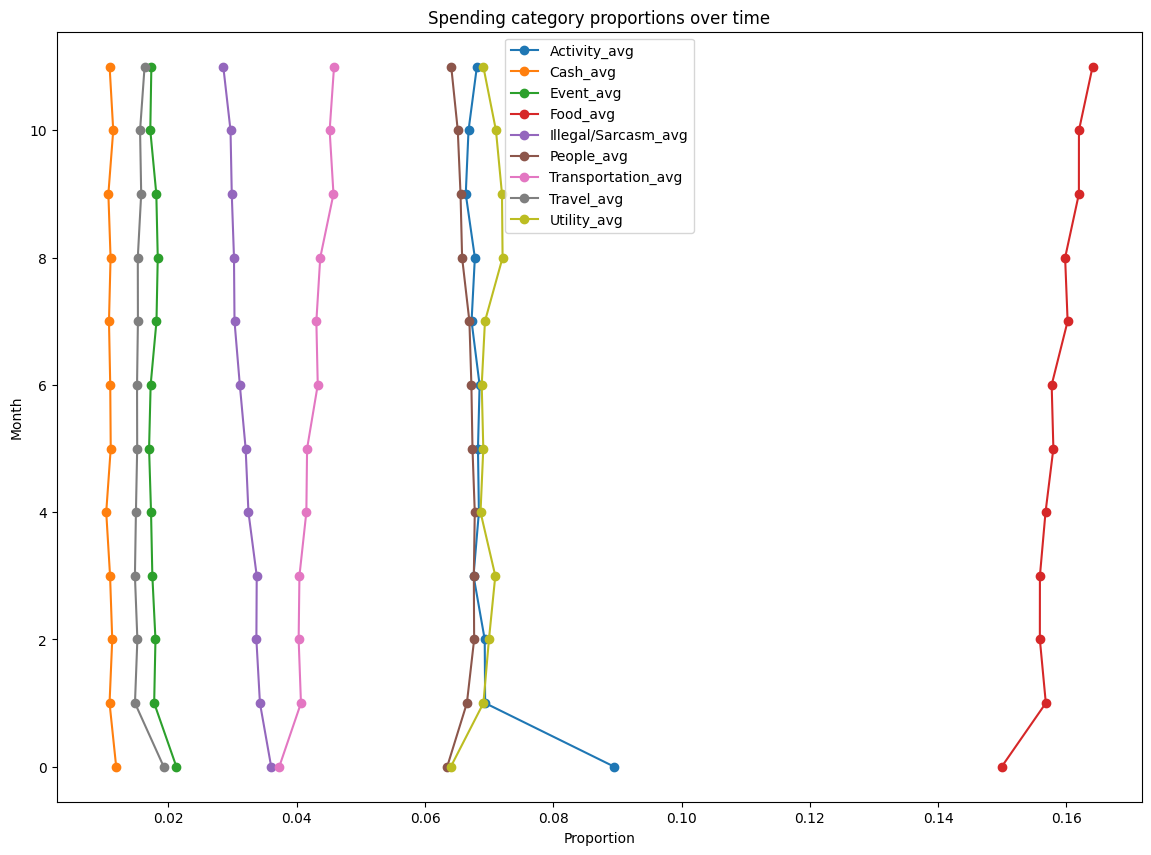

In [ ]:
# Sort your DataFrame
pdf_melted_sorted = pdf_melted.sort_values(['Category', 'month'])

plt.figure(figsize=(14, 10))

for category in pdf_melted_sorted['Category'].unique():
    category_data = pdf_melted_sorted[pdf_melted_sorted['Category'] == category]
    plt.plot(category_data['Proportion'], category_data['month'], marker='o', label=category)

plt.legend()
plt.xlabel('Proportion')
plt.ylabel('Month')
plt.title('Spending category proportions over time')
plt.show()



Based on the visualization, the spending categories are ranked in descending order of proportions as follows: Food, Utility, Activity, People, Transportation, Illegal/Sarcasm, Event, Travel, and Cash.

In the first month, the proportions for the categories Cash, Travel, Event, and Illegal/Sarcasm saw a decline, after which they remained relatively stable. The Activity category experienced a significant decrease in its proportion in the initial month, post which it also exhibited stability.

Over the course of twelve months, both Transportation and Food categories demonstrated a gradual increase in their proportions. The categories People and Utility, on the other hand, presented minor fluctuations throughout this period.

In [ ]:
column_names = ['Activity_avg','Activity_stddev', 'Cash_avg','Cash_stddev', 'Event_avg', 'Event_stddev','Food_avg', 'Food_stddev','Illegal/Sarcasm_avg', 'Illegal/Sarcasm_stddev','People_avg', 'People_stddev','Transportation_avg', 'Transportation_stddev', 'Travel_avg',  'Travel_stddev', 'Utility_avg', 'Utility_stddev']

# Create two lists for the average and standard deviation column names
avg_columns = [col for col in column_names if 'avg' in col]
stddev_columns = [col for col in column_names if 'stddev' in col]

# Melt the average and stddev dataframes separately
avg_melted = pdf.melt(id_vars='month', value_vars=avg_columns, var_name='Category', value_name='average')
stddev_melted = pdf.melt(id_vars='month', value_vars=stddev_columns, var_name='Category', value_name='std_dev')

# Remove the '_avg' and '_stddev' suffixes from the 'Category' columns
avg_melted['Category'] = avg_melted['Category'].str.replace('_avg', '')
stddev_melted['Category'] = stddev_melted['Category'].str.replace('_stddev', '')

# Merge the two melted dataframes
pdf_melted = pd.merge(avg_melted, stddev_melted,  how='left', left_on=['month','Category'], right_on = ['month','Category'])


In [ ]:
pdf_melted

### after adding the std


In [ ]:
plt.figure(figsize=(14, 10))

# Sort your DataFrame
pdf_sorted = pdf_melted.sort_values(['Category', 'month'])

# Loop over each category
for category in pdf_sorted['Category'].unique():
    category_data = pdf_sorted[pdf_sorted['Category'] == category]
    plt.plot(category_data['average'], category_data['month'], marker='o', label=category)
    plt.fill_betweenx(category_data['month'], 
                      category_data['average'] - 2*category_data['std_dev'], 
                      category_data['average'] + 2*category_data['std_dev'], 
                      alpha=0.2)

plt.legend()
plt.ylabel('Month')
plt.xlabel('Average Proportion')
plt.title('Average spending category proportions over time with confidence intervals')
plt.show()


In [ ]:
# from pyspark.sql import functions as F
# from pyspark.sql.window import Window
# from functools import reduce
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from pyspark.sql.functions import month, year

# # Convert the 'datetime' column to a timestamp type
# df_spark = df_spark.withColumn('month', F.date_format('datetime', 'MM'))

# # Calculate month difference with the first transaction
# windowSpec = Window.partitionBy('user1').orderBy('datetime')
# df_spark = df_spark.withColumn("month", F.floor((F.unix_timestamp('datetime') - F.unix_timestamp(F.first('datetime').over(windowSpec))) / (60 * 60 * 24 * 30)))

# # Filter transactions for the first 12 months
# df_spark= df_spark.filter(F.col('month') < 12)

# # Group by both 'user1' and 'month', then count the categories
# grouped = df_spark.groupBy('user1', 'month', 'category').count()

# # Pivot the DataFrame to have a column for each category
# pivoted = grouped.groupBy('user1', 'month').pivot('category').sum('count').fillna(0)

# # Columns that you want to sum up
# column_names = ['Activity', 'Cash', 'Event', 'Food', 'Illegal/Sarcasm', 'People', 'Transportation', 'Travel', 'Unknown', 'Utility']

# # Calculate the sum for each row
# pivoted = pivoted.withColumn("total", reduce(lambda a, b: a + b, [F.col(c) for c in column_names]))

# # Calculate the proportion for each category
# for col in column_names:
#     pivoted = pivoted.withColumn(f"{col}_proportion", F.when(pivoted["total"] != 0, F.col(col) / pivoted["total"]).otherwise(0))

# # Drop unnecessary columns
# for col in column_names:
#     pivoted = pivoted.drop(col)

# pivoted = pivoted.drop('total')

# # Group by month and calculate average and standard deviation for each category proportion
# agg_exprs = []

# for c in column_names:
#     avg_expr = F.avg(c+"_proportion").alias(c+"_avg")
#     stddev_expr = F.stddev(c+"_proportion").alias(c+"_stddev")
#     agg_exprs.extend([avg_expr, stddev_expr])

# aggregated = pivoted.groupBy('month').agg(*agg_exprs)



# # Convert to Pandas DataFrame for plotting
# pdf = aggregated.toPandas()

# # Plotting
# plt.figure(figsize=(14,10))

# for col in column_names:
#     # plt.errorbar(pdf['month'], pdf[f"{col}_avg"], yerr=2*pdf[f"{col}_stddev"], label=col)
#   sns.lineplot(x=pdf[f"{col}_avg"], y=pdf['month'], hue='category', data=pdf, palette='tab10')

# # plt.legend()
# # plt.xlabel('Month')
# # plt.ylabel('Average proportion')
# # plt.title('Spending category proportions over time')
# # plt.show()


# sns.lineplot(x='proportion', y='month', hue='category', data=df, palette='tab10')

# # Set the title and labels
# plt.title('Proportion Over Months')
# plt.xlabel('Proportion')
# plt.ylabel('Month')

# # Display the legend
# plt.legend()

# # Show the plot
# plt.show()

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming you have the dataset stored in a DataFrame called 'df'

# # Set the month as a categorical variable to ensure correct sorting
# df['month'] = pd.Categorical(df['month'], categories=range(1, 13))

# # Set the plot style
# sns.set(style='darkgrid')

# # Create the line chart
# plt.figure(figsize=(10, 6))
# sns.lineplot(x='proportion', y='month', hue='category', data=df, palette='tab10')

# # Set the title and labels
# plt.title('Proportion Over Months')
# plt.xlabel('Proportion')
# plt.ylabel('Month')

# # Display the legend
# plt.legend()

# # Show the plot
# plt.show()


## Social Network Analytics

In [ ]:
#Q5
df_cat.head()

,user1,user2,transaction_type,datetime,description,is_business,story_id,category
0,1218774,1528945,payment,2015-11-27 10:48:19,Uber,False,5657c473cd03c9af22cff874,Transportation
1,5109483,4782303,payment,2015-06-17 11:37:04,Costco,False,5580f9702b64f70ab0114e94,Food
2,4322148,3392963,payment,2015-06-19 07:05:31,Sweaty balls,False,55835ccb1a624b14ac62cef4,Illegal/Sarcasm
3,469894,1333620,charge,2016-06-03 23:34:13,🎥,False,5751b185cd03c9af224c0d17,Event
4,2960727,3442373,payment,2016-05-29 23:23:42,⚡,False,574b178ecd03c9af22cf67f4,Utility


In [ ]:
df_cat_sample = df_cat.sample(frac=0.00001, random_state=42)
df_cat_sample.head()


,user1,user2,transaction_type,datetime,description,is_business,story_id,category
6191280,4194500,4390265,charge,2016-02-07 09:41:08,Lol,False,56b6a0b4cd03c9af22fbc10b,People
1335074,4044268,4949807,payment,2016-08-30 03:54:24,Firewater,False,57c4a10023e064eac0bd35d1,Unknown
2424202,1857931,3786588,payment,2015-12-04 11:45:02,👸🏼👸🏼👸🏼👑 dinner,False,56610c3ecd03c9af224563ec,Food
42083,2142454,6935097,payment,2016-03-12 09:29:10,Stuff,False,56e370e6cd03c9af22c0f324,Unknown
6716251,3596393,2141408,payment,2016-01-04 05:39:08,Skiing,False,568994fccd03c9af22453377,Unknown


In [ ]:
row_count = df_cat_sample['user1'].count()
print("Number of rows in the 'user1' column:", row_count)


Number of rows in the 'user1' column: 71


In [ ]:
def find_friends_and_friends_of_friends(user_id, transactions):
    friends = set()
    friends_of_friends = set()

    # Step 2: Get transactions involving the user
    user_transactions = [t for t in transactions if t['user1'] == user_id or t['user2'] == user_id]

    # Step 3: Find friends
    for transaction in user_transactions:
        if transaction['user1'] == user_id:
            friends.add(transaction['user2'])
        else:
            friends.add(transaction['user1'])

    # Step 5: Find friends of friends
    for friend in friends:
        friend_transactions = [t for t in transactions if (t['user1'] == friend or t['user2'] == friend) and (t['user1'] != user_id and t['user2'] != user_id)]
        for transaction in friend_transactions:
            if transaction['user1'] == friend:
                friends_of_friends.add(transaction['user2'])
            else:
                friends_of_friends.add(transaction['user1'])

    return friends, friends_of_friends


In [ ]:
records = df_cat[['user1', 'user2']]

In [ ]:
transactions = records.to_dict('records')
transactions

[{'user1': 1218774, 'user2': 1528945},
 {'user1': 5109483, 'user2': 4782303},
 {'user1': 4322148, 'user2': 3392963},
 {'user1': 469894, 'user2': 1333620},
 {'user1': 2960727, 'user2': 3442373},
 {'user1': 3977544, 'user2': 2709470},
 {'user1': 3766386, 'user2': 4209061},
 {'user1': 730075, 'user2': 804466},
 {'user1': 5221751, 'user2': 4993533},
 {'user1': 6843582, 'user2': 7308338},
 {'user1': 5317324, 'user2': 3942984},
 {'user1': 1134661, 'user2': 1556430},
 {'user1': 4238868, 'user2': 4879587},
 {'user1': 11719500, 'user2': 8702716},
 {'user1': 3625798, 'user2': 5692302},
 {'user1': 613908, 'user2': 3045405},
 {'user1': 4682257, 'user2': 1870271},
 {'user1': 9414481, 'user2': 2869012},
 {'user1': 241386, 'user2': 2580543},
 {'user1': 656477, 'user2': 656214},
 {'user1': 7077930, 'user2': 2219363},
 {'user1': 219836, 'user2': 190689},
 {'user1': 6222232, 'user2': 9644915},
 {'user1': 1958142, 'user2': 252308},
 {'user1': 470775, 'user2': 558040},
 {'user1': 801230, 'user2': 1387123}

In [ ]:
user_id = 1218774
user_friends, user_friends_of_friends = find_friends_and_friends_of_friends(user_id, transactions)
print("User's friends:", user_friends)
print("User's friends of friends:", user_friends_of_friends)

User's friends: {6784812, 825037, 1528945, 2299797, 2248062}
User's friends of friends: {6057731, 3271698, 3414812, 3953567, 4445092, 3119785, 5590314, 3703726, 2633912, 2760507, 11265984, 1094209, 2366018, 473667, 502595, 2097475, 3485121, 974023, 8747467, 4159821, 1282126, 825037, 2324311, 1597784, 2420441, 8718297, 963800, 1682016, 1098208, 2813794, 4616676, 10549093, 921063, 4873067, 1528945, 2468982, 694525, 2248062}


In [ ]:
for i in df_cat_sample['user1']:
  user_id = i
  user_friends, user_friends_of_friends = find_friends_and_friends_of_friends(user_id, transactions)
  print("User:", i)
  print("User's friends:", user_friends)
  print("User's friends of friends:", user_friends_of_friends)

User: 4194500
User's friends: {4232584, 5357273, 6208664, 4390265, 4184859, 2304092}
User's friends of friends: {6920001, 4232391, 4232584, 4390265, 3653355, 891631, 3203409, 2364817, 1065588, 4802008, 5357273, 4184859, 2304092}
User: 4044268
User's friends: {2053040, 7169202, 4949807}
User's friends of friends: {3698496, 1347363, 925357, 2679315, 5650526, 11427486}
User: 1857931
User's friends: {2974835, 1681660, 2924794, 3786588, 1854495}
User's friends of friends: {2394592, 263234, 2005027, 4102743, 6621835, 2678832, 1644753, 146611, 1681660, 2726454, 7178487, 3786588, 1656991}
User: 2142454
User's friends: {6935097}
User's friends of friends: set()
User: 3596393
User's friends: {2141408}
User's friends of friends: {6777337, 5318179}
User: 2931102
User's friends: {2813603, 1369028, 3708005, 1754601, 2226832, 1887575, 3191864, 2704766, 1147135}
User's friends of friends: {2717697, 3539586, 7344392, 429064, 2246026, 4098954, 1855758, 1530510, 2149007, 2674068, 950934, 3620761, 671390,

KeyboardInterrupt: ignored

In [ ]:
#Q6
#i
user_id = 1218774
user_friends, user_friends_of_friends = find_friends_and_friends_of_friends(user_id, transactions)
print("Number of User's friends:", len(user_friends))
print("Number of User's friends of friends:", len(user_friends_of_friends))

Number of User's friends: 5
Number of User's friends of friends: 38


In [ ]:
df_number_friends = []
for i in df_cat_sample['user1']:
    user_id = i
    user_friends, user_friends_of_friends = find_friends_and_friends_of_friends(user_id, transactions)
    print("Number of User's friends:", len(user_friends))
    print("Number of User's friends of friends:", len(user_friends_of_friends))
    df_number_friends.append({
        'user': user_id,
        'number_of_friends': len(user_friends),
        'number_of_friends_friends': len(user_friends_of_friends)})
    
print(df_number_friends)

Number of User's friends: 6
Number of User's friends of friends: 13
[{'user': 4194500, 'number_of_friends': 6, 'number_of_friends_friends': 13}]
Number of User's friends: 3
Number of User's friends of friends: 6
[{'user': 4194500, 'number_of_friends': 6, 'number_of_friends_friends': 13}, {'user': 4044268, 'number_of_friends': 3, 'number_of_friends_friends': 6}]
Number of User's friends: 5
Number of User's friends of friends: 13
[{'user': 4194500, 'number_of_friends': 6, 'number_of_friends_friends': 13}, {'user': 4044268, 'number_of_friends': 3, 'number_of_friends_friends': 6}, {'user': 1857931, 'number_of_friends': 5, 'number_of_friends_friends': 13}]
Number of User's friends: 1
Number of User's friends of friends: 0
[{'user': 4194500, 'number_of_friends': 6, 'number_of_friends_friends': 13}, {'user': 4044268, 'number_of_friends': 3, 'number_of_friends_friends': 6}, {'user': 1857931, 'number_of_friends': 5, 'number_of_friends_friends': 13}, {'user': 2142454, 'number_of_friends': 1, 'nu

In [ ]:
df_number_friends = pd.DataFrame(df_number_friends, columns=['user', 'number_of_friends', 'number_of_friends_friends'])

In [ ]:
#ii
def calculate_clustering_coefficient(user_id, transactions):
    # Build a dictionary to store neighbors for each user
    user_neighbors = {}

    # Iterate over the transactions to populate the user_neighbors dictionary
    for transaction in transactions:
        sender = transaction['user1']
        receiver = transaction['user2']

        # Check if the sender is already in the user_neighbors dictionary
        if sender in user_neighbors:
            user_neighbors[sender].add(receiver)
        else:
            user_neighbors[sender] = {receiver}

        # Check if the receiver is already in the user_neighbors dictionary
        if receiver in user_neighbors:
            user_neighbors[receiver].add(sender)
        else:
            user_neighbors[receiver] = {sender}

    # Calculate the clustering coefficient for the user
    if user_id in user_neighbors:
        neighbors = user_neighbors[user_id]
        num_neighbors = len(neighbors)

        if num_neighbors <= 1:
            return 0.0

        # Count the number of connections between the neighbors
        num_connections = 0
        for neighbor in neighbors:
            if neighbor in user_neighbors:
                for neighbor_of_neighbor in user_neighbors[neighbor]:
                    if neighbor_of_neighbor in neighbors:
                        num_connections += 1

        # Calculate the clustering coefficient
        clustering_coefficient = 2.0 * num_connections / (num_neighbors * (num_neighbors - 1))
        return clustering_coefficient
    else:
        return 0.0



In [ ]:
user_id = 1218774

clustering_coefficient = calculate_clustering_coefficient(user_id, transactions)

print("Clustering coefficient:", clustering_coefficient)

Clustering coefficient: 0.4


In [ ]:
df_clustering = []
for i in df_cat_sample['user1']:
    user_id = i
    clustering_coefficient = calculate_clustering_coefficient(user_id, transactions)

    print("Clustering coefficient:", clustering_coefficient)
    df_clustering.append({
        'user': user_id,
        'Clustering coefficient': clustering_coefficient})
    
print(df_clustering)

Clustering coefficient: 0.5333333333333333
Clustering coefficient: 0.0
Clustering coefficient: 0.2
Clustering coefficient: 0.0
Clustering coefficient: 0.0
Clustering coefficient: 0.05555555555555555
Clustering coefficient: 0.03636363636363636
Clustering coefficient: 0.5
Clustering coefficient: 0.1286549707602339
Clustering coefficient: 0.0
Clustering coefficient: 0.09523809523809523
Clustering coefficient: 0.13333333333333333
Clustering coefficient: 0.14545454545454545
Clustering coefficient: 0.0
Clustering coefficient: 0.0
Clustering coefficient: 0.2
Clustering coefficient: 0.3333333333333333
Clustering coefficient: 0.2
Clustering coefficient: 0.35714285714285715
Clustering coefficient: 0.0
Clustering coefficient: 0.2777777777777778
Clustering coefficient: 0.0
Clustering coefficient: 0.0
Clustering coefficient: 0.03636363636363636
Clustering coefficient: 0.20512820512820512
Clustering coefficient: 0.023391812865497075
Clustering coefficient: 0.16666666666666666
Clustering coefficient:

In [ ]:
df_clustering = pd.DataFrame(df_clustering, columns=['user',  'Clustering coefficient'])

In [ ]:
#iii
import networkx as nx
import pandas as pd

def calculate_page_rank(transactions):
    # Create a directed graph from the transactions
    G = nx.DiGraph()
    for transaction in transactions:
        sender = transaction['user1']
        receiver = transaction['user2']
        G.add_edge(sender, receiver)

    # Calculate the PageRank
    page_rank = nx.pagerank(G)

    return sender,page_rank

In [ ]:
sender, page_rank = calculate_page_rank(transactions)
df_page_rank = pd.DataFrame.from_dict(page_rank, orient='index', columns=['PageRank'])
df_page_rank['user'] = df_page_rank.index

print(df_page_rank)

             PageRank     user
1218774  4.936346e-07  1218774
1528945  7.997994e-07  1528945
5109483  1.299243e-07  5109483
4782303  5.522976e-07  4782303
4322148  6.588111e-07  4322148
...               ...      ...
181818   2.707154e-07   181818
3222129  2.707154e-07  3222129
3061903  2.003199e-07  3061903
4633163  1.651221e-07  4633163
7879432  1.299243e-07  7879432

[3018657 rows x 2 columns]


## Predictive Analytics with MLlib

Q7 [5 pt]: First, create your dependent variable Y, i.e. the total number of transactions at lifetime point 12. In other words, for every user, you need to count how many transactions s/he had committed during her/his twelve months in Venmo.

Assumption: first 12 months: 12 months from the first transaction

In [ ]:
from pyspark.sql.functions import col

## combine user 1 and user 2
df_user1 = df_spark.select("*").withColumnRenamed("user1", "user").drop("user2")

df_user2 = df_spark.select("*").withColumnRenamed("user2", "user").drop("user1")

# Combine the user 1 and user 2 using union() function
df_user1_2 = df_user1.union(df_user2)

df_user1_2.show()

+----+----------------+-------------------+--------------------+-----------+--------------------+--------+----------------+-----+----------+
|user|transaction_type|           datetime|         description|is_business|            story_id|category|days_since_first|month|month_year|
+----+----------------+-------------------+--------------------+-----------+--------------------+--------+----------------+-----+----------+
|  34|          charge|2014-07-21 23:31:20|          Giwa sauce|      false|53cd40587d0b0354e...|    Food|               0|    0|   2014-07|
|  34|         payment|2014-09-15 08:00:57|2nd place (350 - ...|      false|54163a4a7d0b0354e...|  Travel|              56|    2|   2014-09|
|  34|         payment|2014-10-24 02:16:48|             A bagel|      false|544954217d0b0354e...|    Food|              95|    4|   2014-10|
| 126|         payment|2012-06-26 22:15:32|          for futbol|      false|4fe9d214c5b30a098...|Activity|               0|    0|   2012-06|
| 126|       

In [ ]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window
from pyspark.sql.functions import month, year
from pyspark.sql.functions import col, count, date_add


# Convert the 'datetime' column to a timestamp type: use the combine data
data = df_user1_2.withColumn('month', F.date_format('datetime', 'MM'))

# Calculate month difference with the first transaction
windowSpec = Window.partitionBy('user').orderBy('datetime')
data = data.withColumn("month", F.floor((F.unix_timestamp('datetime') - F.unix_timestamp(F.first('datetime').over(windowSpec))) / (60 * 60 * 24 * 30)))

# Filter transactions for the first 12 months
data = data.filter(F.col('month') <= 12)

## count the number of transactions for each user
transaction_number = data.groupBy('user').agg(count('*').alias('Y'))
transaction_number.show()

+----+---+
|user|  Y|
+----+---+
|   3|  6|
|   6|  2|
|   9|  5|
|  12|  5|
|  13|  5|
|  16|  6|
|  19|  2|
|  28|  2|
|  31|  1|
|  34|  5|
|  43| 18|
|  47|  1|
|  52|  1|
| 108|  1|
| 112|  5|
| 126|  2|
| 133|  1|
| 140|  2|
| 142|  1|
| 159|  1|
+----+---+
only showing top 20 rows



In [ ]:
transaction_number_df = transaction_number.toDF("user", "Y")
transaction_number_df.show()

+----+---+
|user|  Y|
+----+---+
|   3|  6|
|   6|  2|
|   9|  5|
|  12|  5|
|  13|  5|
|  16|  6|
|  19|  2|
|  28|  2|
|  31|  1|
|  34|  5|
|  43| 18|
|  47|  1|
|  52|  1|
| 108|  1|
| 112|  5|
| 126|  2|
| 133|  1|
| 140|  2|
| 142|  1|
| 159|  1|
+----+---+
only showing top 20 rows



Q8 [5 pts]: Create the recency and frequency variables. In CRM, this predictive framework is known as RFM. Here, you don’t have monetary amounts, so we will focus on just RF. Recency refers to the last time a user was active, and frequency is how often a user uses Venmo in a month. You need to compute these metrics across a user’s lifetime in Venmo (from 0 up to 12).
For example, if a user has used Venmo twice during her first month in Venmo with the second time being on day x, then her recency in month 1 is “30-x” and her frequency is 30/2=15.

In [ ]:
from pyspark.sql.functions import col, count, date_add, dayofmonth, max

# Convert the 'datetime' column to a timestamp type: use the combine data
data = df_user1_2.withColumn('month', F.date_format('datetime', 'MM'))

# Calculate month difference with the first transaction
windowSpec = Window.partitionBy('user').orderBy('datetime')
data = data.withColumn("month", F.floor((F.unix_timestamp('datetime') - F.unix_timestamp(F.first('datetime').over(windowSpec))) / (60 * 60 * 24 * 30)))

# Filter transactions for the first 12 months
data = data.filter(F.col('month') <= 12)


# Calculate the recency: use "30-recent_date"; frequency: use "30/the number of transactions"
recency_frequency = data.groupby("user", "month") \
                          .agg(max("datetime").alias("recent_transaction_date"), 
                               count("description").alias("transaction_numbers")) \
                          .withColumn("recent_day", dayofmonth(col("recent_transaction_date"))) \
                          .withColumn("recency", 30 - col("recent_day")) \
                          .withColumn("frequency", 30 / col("transaction_numbers"))

# Show the DataFrame with user, day, and recency columns
recency_frequency.show()

+----+-----+-----------------------+-------------------+----------+-------+---------+
|user|month|recent_transaction_date|transaction_numbers|recent_day|recency|frequency|
+----+-----+-----------------------+-------------------+----------+-------+---------+
|  12|    0|    2012-09-01 03:40:16|                  1|         1|     29|     30.0|
|  12|    1|    2012-10-03 06:50:23|                  1|         3|     27|     30.0|
|  12|    5|    2013-02-11 03:06:50|                  1|        11|     19|     30.0|
|  12|    8|    2013-05-06 05:45:39|                  1|         6|     24|     30.0|
|  12|   11|    2013-08-02 03:23:23|                  1|         2|     28|     30.0|
|  28|    0|    2014-06-02 11:02:23|                  2|         2|     28|     15.0|
|  31|    0|    2013-05-19 11:19:15|                  1|        19|     11|     30.0|
|  34|    0|    2014-07-21 23:31:20|                  1|        21|      9|     30.0|
|  34|    1|    2014-09-15 08:00:57|                  

In [ ]:
from pyspark.sql.functions import first

# Convert the transaction_month column to a numeric type
recency_frequency_new = recency_frequency.withColumn("month", recency_frequency["month"].cast("int"))

# Group the data by user and transaction_month, and aggregate the recency and frequency
recency_frequency_new = recency_frequency_new.groupBy("user").pivot("month").agg(first("recency").alias("recency"), first("frequency").alias("frequency"))

# Fill the missing values with zeros
recency_frequency_new = recency_frequency_new.fillna(0)

# display the recency and frequency for each user from 0-12 months
recency_frequency_new.show()

+----+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+----------+------------+----------+------------+----------+------------+
|user|0_recency|0_frequency|1_recency|1_frequency|2_recency|2_frequency|3_recency|3_frequency|4_recency|4_frequency|5_recency|5_frequency|6_recency|6_frequency|7_recency|7_frequency|8_recency|8_frequency|9_recency|9_frequency|10_recency|10_frequency|11_recency|11_frequency|12_recency|12_frequency|
+----+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+----------+------------+----------+------------+----------+------------+
|  12|       29|       30.0|       27|       30.0|        0|        0.0|        0|        0.0|        0

Q9 [10 pts]: For each user’s lifetime point, regress recency and frequency on Y. Plot the MSE for each lifetime point. In other words, your x-axis will be lifetime in months (0-12), and your y-axis will be the MSE. (Hint: Don’t forget to split your data into train and test sets).

In [ ]:
## add Y to the recency_frequency dataframe: inner join transaction_number and recency_frequency

data_q9 = recency_frequency_new.join(transaction_number, "user", "inner")

data_q9.show()

+----+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+----------+------------+----------+------------+----------+------------+---+
|user|0_recency|0_frequency|1_recency|1_frequency|2_recency|2_frequency|3_recency|3_frequency|4_recency|4_frequency|5_recency|5_frequency|6_recency|6_frequency|7_recency|7_frequency|8_recency|8_frequency|9_recency|9_frequency|10_recency|10_frequency|11_recency|11_frequency|12_recency|12_frequency|  Y|
+----+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+----------+------------+----------+------------+----------+------------+---+
|   3|       21|        5.0|        0|        0.0|        0|        0.0|        0|        0

In [ ]:
sampled_data_q9 = data_q9.sample(withReplacement = False, fraction = 0.0001, seed = 42)

sampled_data_q9.show()

+-------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+----------+------------+----------+------------+----------+------------+---+
|   user|0_recency|0_frequency|1_recency|1_frequency|2_recency|2_frequency|3_recency|3_frequency|4_recency|4_frequency|5_recency|5_frequency|6_recency|6_frequency|7_recency|7_frequency|8_recency|8_frequency|9_recency|9_frequency|10_recency|10_frequency|11_recency|11_frequency|12_recency|12_frequency|  Y|
+-------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+----------+------------+----------+------------+----------+------------+---+
| 420858|        4|       30.0|        0|        0.0|        0|        0.0|       

In [ ]:
column_length = sampled_data_q9.select("user").count()
print("Column length:", column_length)

Column length: 304


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_mse(train_data, test_data, month):
    # Prepare the features and transform the data
    train_features = np.array(train_data.select([f"{month}_recency", f"{month}_frequency"]).collect())
    train_labels = np.array(train_data.select("Y").collect())
    test_features = np.array(test_data.select([f"{month}_recency", f"{month}_frequency"]).collect())

    # Create a Linear Regression model and fit it to the training data
    X = np.column_stack((train_features, np.ones(train_features.shape[0])))
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(train_labels)

    # Make predictions on test data
    X_test = np.column_stack((test_features, np.ones(test_features.shape[0])))
    predictions = X_test.dot(theta)

    # Calculate MSE
    mse = np.mean((predictions - test_data.select("Y").collect()) ** 2)

    return mse

# Split the data into train and test sets
train_ratio = 0.8
train_data, test_data = sampled_data_q9.randomSplit([train_ratio, 1-train_ratio], seed=42)

month_list = []
mse_list = []

# Lifetime in months (0-12): use for loop
for month in range(13):
    mse = calculate_mse(train_data, test_data, month)
    month_list.append(month)
    mse_list.append(mse)
    print(month_list)
    print(mse_list)

# Plot the MSE for each lifetime point
plt.plot(month_list, mse_list)
plt.xlabel("Lifetime in months (0-12)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE for Each Lifetime Point")
plt.show()



ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/content/spark-3.2.4-bin-hadoop3.2/python/lib/py4j-0.10.9.5-src.zip/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/content/spark-3.2.4-bin-hadoop3.2/python/lib/py4j-0.10.9.5-src.zip/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: ignored

[0]
[7.395468891425661]
[0, 1]
[7.395468891425661, 9.79285938074761]
[0, 1, 2]
[7.395468891425661, 9.79285938074761, 10.633788489848929]


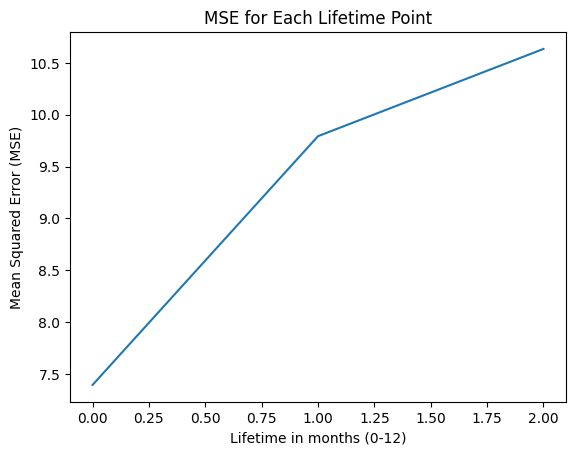

In [ ]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import VectorAssembler
import matplotlib.pyplot as plt

def calculate_mse(train_data, test_data, month):
    # Prepare the features and transform the data
    assembler = VectorAssembler(inputCols=[f"{month}_recency", f"{month}_frequency"], outputCol="features")
    train_features = assembler.transform(train_data)
    test_features = assembler.transform(test_data)

    # Create a Linear Regression model and fit it to the training data
    linear_reg = LinearRegression(featuresCol="features", labelCol="Y")
    linear_reg_model = linear_reg.fit(train_features)

    # Make predictions on test data
    predictions = linear_reg_model.transform(test_features)

    # Evaluate the model using MSE
    evaluator = RegressionEvaluator(labelCol="Y", predictionCol="prediction", metricName="mse")
    mse = evaluator.evaluate(predictions)

    return mse

# split the data into train and test sets
train_data, test_data = sampled_data_q9.randomSplit([0.8, 0.2], seed=42)

month_list = []
mse_list = []

# lifetime in months (0-12): use for loop
for month in range(13):
    mse = calculate_mse(train_data, test_data, month)
    month_list.append(month)
    mse_list.append(mse)
    print(month_list)
    print(mse_list)

# Plot the MSE for each lifetime point
plt.plot(month_list, mse_list)
plt.xlabel("Lifetime in months (0-12)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE for Each Lifetime Point")
plt.show()


Q10 [5 pts]: For each user’s lifetime point, regress recency, frequency AND her spending
behavior profile on Y. Plot the MSE for each lifetime point like above. Did you get any
improvemen

In [ ]:
spending_profile = spending_profile.select('user1', 'month_year', 'Activity', 'Cash', 'Event', 'Food', 'Illegal/Sarcasm',
                           'People', 'Transportation', 'Travel', 'Unknown', 'Utility')
spending_profile = spending_profile.withColumnRenamed("month_year","month").withColumnRenamed("user1","user")

spending_profile.show()

+-------+-----+--------+----+-----+----+---------------+------+--------------+------+-------+-------+
|   user|month|Activity|Cash|Event|Food|Illegal/Sarcasm|People|Transportation|Travel|Unknown|Utility|
+-------+-----+--------+----+-----+----+---------------+------+--------------+------+-------+-------+
| 820531|    0|       4|   0|    0|   0|              0|     0|             0|     0|      0|      0|
| 820531|    1|       7|   1|    0|   0|              0|     0|             0|     0|      0|      0|
| 820531|    2|       4|   2|    0|   0|              0|     0|             0|     0|      0|      0|
| 820531|    3|      10|   3|    0|   0|              0|     0|             0|     0|      0|      0|
| 820531|    4|       8|   2|    0|   0|              0|     0|             0|     0|      0|      0|
| 820531|    5|      17|   4|    0|   0|              0|     0|             0|     0|      0|      0|
| 820531|    6|      23|   3|    0|   0|              0|     0|             0|    

In [ ]:
from pyspark.sql.functions import first

# Convert the transaction_month column to a numeric type
spending_profile = spending_profile.withColumn("month", spending_profile["month"].cast("int"))

# Group the data by user and transaction_month, and aggregate the recency and frequency
spending_profile = spending_profile.groupBy("user").pivot("month").agg(first("Activity").alias("Activity"), first("Cash").alias("Cash")
                                        , first("Event").alias("Event"), first("Food").alias("Food")
                                        , first("Illegal/Sarcasm").alias("Illegal/Sarcasm"), first("People").alias("People")
                                        , first("Transportation").alias("Transportation"), first("Travel").alias("Travel")
                                        , first("Unknown").alias("Unknown"), first("Utility").alias("Utility"))

# Fill the missing values with zeros
spending_profile_new = spending_profile.fillna(0)

# display the recency and frequency for each user from 0-12 months
spending_profile_new.show()

In [ ]:
import pandas as pd
data_q10 = spending_profile_new.join(data_q9, "user", "inner")
data_q10.show()

+-------+----------+------+-------+------+-----------------+--------+----------------+--------+---------+---------+----------+------+-------+------+-----------------+--------+----------------+--------+---------+---------+----------+------+-------+------+-----------------+--------+----------------+--------+---------+---------+----------+------+-------+------+-----------------+--------+----------------+--------+---------+---------+----------+------+-------+------+-----------------+--------+----------------+--------+---------+---------+----------+------+-------+------+-----------------+--------+----------------+--------+---------+---------+----------+------+-------+------+-----------------+--------+----------------+--------+---------+---------+----------+------+-------+------+-----------------+--------+----------------+--------+---------+---------+----------+------+-------+------+-----------------+--------+----------------+--------+---------+---------+----------+------+-------+------+----

Q10 [10 pts]: For each user’s lifetime point, regress her social network metrics on Y. Plot the
MSE for each lifetime point like above. What do you observe? How do social network
metrics compare with the RF framework? What are the most informative predictors?

[0]
[1694.9948680940709]
[0, 1]
[1694.9948680940709, 537.2307023535144]
[0, 1, 2]
[1694.9948680940709, 537.2307023535144, 378.40007711060076]
[0, 1, 2, 3]
[1694.9948680940709, 537.2307023535144, 378.40007711060076, 3082.9666712064213]
[0, 1, 2, 3, 4]
[1694.9948680940709, 537.2307023535144, 378.40007711060076, 3082.9666712064213, 874.600302426148]
[0, 1, 2, 3, 4, 5]
[1694.9948680940709, 537.2307023535144, 378.40007711060076, 3082.9666712064213, 874.600302426148, 2420.4830311254013]
[0, 1, 2, 3, 4, 5, 6]
[1694.9948680940709, 537.2307023535144, 378.40007711060076, 3082.9666712064213, 874.600302426148, 2420.4830311254013, 414.0120269685679]
[0, 1, 2, 3, 4, 5, 6, 7]
[1694.9948680940709, 537.2307023535144, 378.40007711060076, 3082.9666712064213, 874.600302426148, 2420.4830311254013, 414.0120269685679, 193.54388453820886]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[1694.9948680940709, 537.2307023535144, 378.40007711060076, 3082.9666712064213, 874.600302426148, 2420.4830311254013, 414.0120269685679, 193.5438

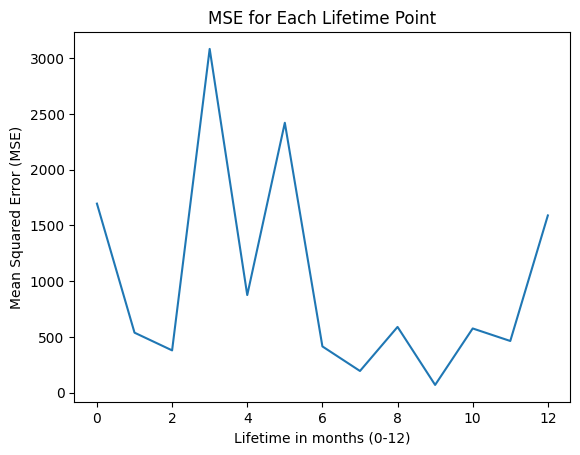

In [ ]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import VectorAssembler
import matplotlib.pyplot as plt

# split the data into train and test sets
train_data, test_data = data_q10.randomSplit([0.8, 0.2], seed=42)


def calculate_mse(train_data, test_data, month):
    # Prepare the features and transform the data
    assembler = VectorAssembler(inputCols=[ f"{month}_Activity"
                        , f"{month}_Cash", f"{month}_Event", f"{month}_Food"
                        , f"{month}_Illegal/Sarcasm", f"{month}_People", f"{month}_Transportation"
                        , f"{month}_Travel", f"{month}_Unknown", f"{month}_Utility"
                        , f"{month}_recency", f"{month}_frequency",],  outputCol="features")
    train_features = assembler.transform(train_data)
    test_features = assembler.transform(test_data)

    # Create a Linear Regression model and fit it to the training data
    linear_reg = LinearRegression(featuresCol="features", labelCol="Y")
    linear_reg_model = linear_reg.fit(train_features)

    # Make predictions on test data
    predictions = linear_reg_model.transform(test_features)

    # Evaluate the model using MSE
    evaluator = RegressionEvaluator(labelCol="Y", predictionCol="prediction", metricName="mse")
    mse = evaluator.evaluate(predictions)

    return mse

month_list = []
mse_list = []


# lifetime in months (0-12): use for loop
for month in range(13):
    mse = calculate_mse(train_data, test_data, month)
    month_list.append(month)
    mse_list.append(mse)
    print(month_list)
    print(mse_list)

# Plot the MSE for each lifetime point
plt.plot(month_list, mse_list)
plt.xlabel("Lifetime in months (0-12)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE for Each Lifetime Point")
plt.show()


**Q10 [10 pts]: For each user’s lifetime point, regress her social network metrics on Y. Plot the
MSE for each lifetime point like above. What do you observe? How do social network
metrics compare with the RF framework? What are the most informati**

In [ ]:
merged_df = pd.merge(df_number_friends, df_clustering, on="user", how="inner")

# Perform the second inner join on merged_df and df3 based on "user" column
df_q10_2 = pd.merge(merged_df, df_page_rank, on="user", how="inner")
df_q10_2

,user,number_of_friends,number_of_friends_friends,Clustering coefficient,PageRank
0,4194500,6,13,0.533333,5.992280e-07
1,4044268,3,6,0.000000,4.115065e-07
2,1857931,5,13,0.200000,7.728703e-07
3,2142454,1,0,0.000000,1.299243e-07
4,3596393,1,2,0.000000,1.299243e-07
...,...,...,...,...,...
66,212384,4,18,1.000000,2.405459e-07
67,679495,7,41,0.190476,6.327496e-07
68,2924915,7,63,0.476190,2.355176e-07
69,5433586,3,3,0.666667,5.522976e-07


In [ ]:
# Convert Pandas DataFrame to PySpark DataFrame
df_q10_2_spark = spark.createDataFrame(df_q10_2)

# Merge the two PySpark DataFrames
new_df_q10_2 = df_q10_2_spark.join(transaction_number_df, on="user", how="inner")
new_df_q10_2.show()


+-------+-----------------+-------------------------+----------------------+--------------------+---+
|   user|number_of_friends|number_of_friends_friends|Clustering coefficient|            PageRank|  Y|
+-------+-----------------+-------------------------+----------------------+--------------------+---+
| 121776|               15|                      127|   0.09523809523809523|4.953208820407279E-7|  6|
| 159028|               23|                      243|   0.05533596837944664|5.301490556736747E-7|  3|
| 186729|               18|                       96|   0.05228758169934641|1.174795326669676...|  3|
| 363694|                7|                       77|    0.6666666666666666|2.547926171708435...| 10|
| 679495|                7|                       41|   0.19047619047619047| 6.32749642115254E-7|  4|
| 691408|                6|                       26|                   0.4| 3.41110962113802E-7|  6|
|1277862|                8|                       22|                   0.0|6.4615

[0]
[19.09999305156782]
[0, 1]
[19.09999305156782, 19.09999305156782]
[0, 1, 2]
[19.09999305156782, 19.09999305156782, 19.09999305156782]
[0, 1, 2, 3]
[19.09999305156782, 19.09999305156782, 19.09999305156782, 19.09999305156782]
[0, 1, 2, 3, 4]
[19.09999305156782, 19.09999305156782, 19.09999305156782, 19.09999305156782, 19.09999305156782]
[0, 1, 2, 3, 4, 5]
[19.09999305156782, 19.09999305156782, 19.09999305156782, 19.09999305156782, 19.09999305156782, 19.09999305156782]
[0, 1, 2, 3, 4, 5, 6]
[19.09999305156782, 19.09999305156782, 19.09999305156782, 19.09999305156782, 19.09999305156782, 19.09999305156782, 19.09999305156782]
[0, 1, 2, 3, 4, 5, 6, 7]
[19.09999305156782, 19.09999305156782, 19.09999305156782, 19.09999305156782, 19.09999305156782, 19.09999305156782, 19.09999305156782, 19.09999305156782]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[19.09999305156782, 19.09999305156782, 19.09999305156782, 19.09999305156782, 19.09999305156782, 19.09999305156782, 19.09999305156782, 19.09999305156782, 19.09999305

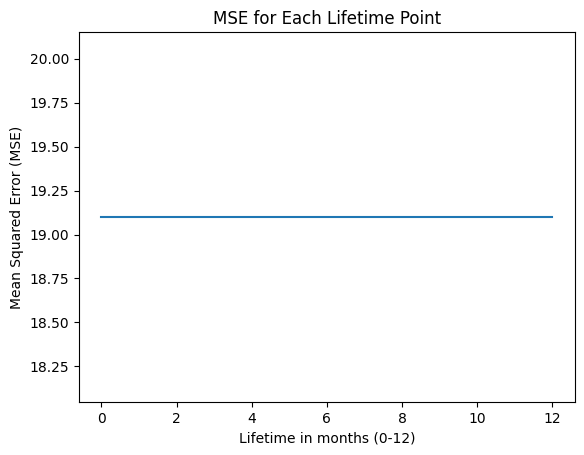

In [ ]:

from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import VectorAssembler
import matplotlib.pyplot as plt

def calculate_mse(train_data, test_data, month):
    # Prepare the features and transform the data
    assembler = VectorAssembler(inputCols=["user", "number_of_friends","number_of_friends_friends","Clustering coefficient","PageRank"], outputCol="features")
    train_features = assembler.transform(train_data)
    test_features = assembler.transform(test_data)

    # Create a Linear Regression model and fit it to the training data
    linear_reg = LinearRegression(featuresCol="features", labelCol="Y")
    linear_reg_model = linear_reg.fit(train_features)

    # Make predictions on test data
    predictions = linear_reg_model.transform(test_features)

    # Evaluate the model using MSE
    evaluator = RegressionEvaluator(labelCol="Y", predictionCol="prediction", metricName="mse")
    mse = evaluator.evaluate(predictions)

    return mse

# split the data into train and test sets
train_data, test_data = new_df_q10_2.randomSplit([0.8, 0.2], seed=42)

month_list = []
mse_list = []

# lifetime in months (0-12): use for loop
for month in range(13):
    mse = calculate_mse(train_data, test_data, month)
    month_list.append(month)
    mse_list.append(mse)
    print(month_list)
    print(mse_list)

# Plot the MSE for each lifetime point
plt.plot(month_list, mse_list)
plt.xlabel("Lifetime in months (0-12)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE for Each Lifetime Point")
plt.show()

**Q11 [10 pts]: For each user’s lifetime point, regress her social network metrics and the
spending behavior of her social network on Y. Plot the MSE for each lifetime point like
above. Does the spending behavior of her social network add any predictive benefit
compared to Q10?**

In [ ]:
data_q11 = new_df_q10_2.join(spending_profile_new, "user", "inner")

In [ ]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import VectorAssembler
import matplotlib.pyplot as plt

def calculate_mse(train_data, test_data, month):
    # Prepare the features and transform the data
    assembler = VectorAssembler(inputCols=["user", "number_of_friends","number_of_friends_friends","Clustering coefficient","PageRank",f"{month}_Activity"
                        , f"{month}_Cash", f"{month}_Event", f"{month}_Food"
                        , f"{month}_Illegal/Sarcasm", f"{month}_People", f"{month}_Transportation"
                        , f"{month}_Travel", f"{month}_Unknown", f"{month}_Utility"], outputCol="features")
    train_features = assembler.transform(train_data)
    test_features = assembler.transform(test_data)

    # Create a Linear Regression model and fit it to the training data
    linear_reg = LinearRegression(featuresCol="features", labelCol="Y")
    linear_reg_model = linear_reg.fit(train_features)

    # Make predictions on test data
    predictions = linear_reg_model.transform(test_features)

    # Evaluate the model using MSE
    evaluator = RegressionEvaluator(labelCol="Y", predictionCol="prediction", metricName="mse")
    mse = evaluator.evaluate(predictions)

    return mse

# split the data into train and test sets
train_data, test_data = data_q11.randomSplit([0.8, 0.2], seed=42)

month_list = []
mse_list = []

# lifetime in months (0-12): use for loop
for month in range(13):
    mse = calculate_mse(train_data, test_data, month)
    month_list.append(month)
    mse_list.append(mse)
    print(month_list)
    print(mse_list)

# Plot the MSE for each lifetime point
plt.plot(month_list, mse_list)
plt.xlabel("Lifetime in months (0-12)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE for Each Lifetime Point")
plt.show()